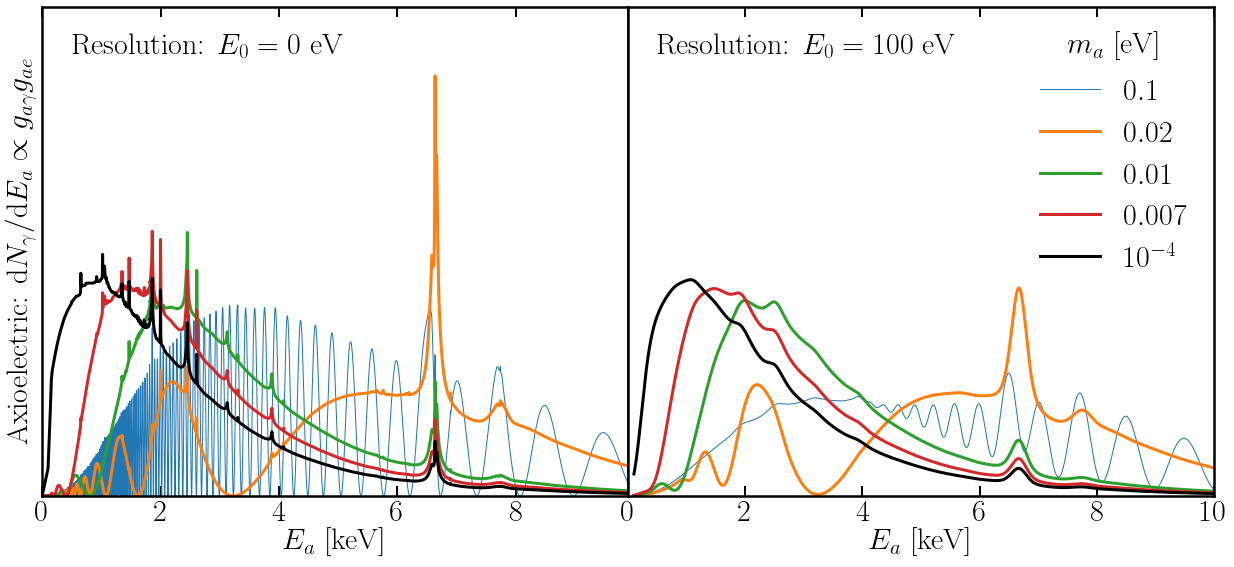

In [2]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from AxionFuncs import PhotonNumber_Electron,AxionFlux_Axioelectron, smear, smearFast

# init plot
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(21,9))
gs = gridspec.GridSpec(1, 2, wspace=0.0)


ax = fig.add_subplot(gs[0])


na = 7000
Ea = linspace(0.01,11,na)

Flux = AxionFlux_Axioelectron(1e-10,Ea)

F = PhotonNumber_Electron(Flux,Ea,0.1)
plt.plot(Ea,F/sum(F),linewidth=1,label=r'$0.1$')

F = PhotonNumber_Electron(Flux,Ea,0.02)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.02$')

F = PhotonNumber_Electron(Flux,Ea,0.01)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.01$')

F = PhotonNumber_Electron(Flux,Ea,0.007)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.007$')

F = PhotonNumber_Electron(Flux,Ea,1e-4)
plt.plot(Ea,F/sum(F),'k',linewidth=3,label=r'$10^{-4}$')

#plt.text(-1.75,0.0012/2,r'$g_{ae}$',fontsize=50)

# Plot fiddling
ax.set_xlim(left=0.0,right=9.9)
ax.set_ylim(bottom=0.0,top=0.0012)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xticks(fontsize=30)
plt.xlabel(r"$E_a$ [keV]",fontsize=30)
plt.yticks([], [])
plt.ylabel(r"Axioelectric: ${\rm d}N_\gamma/{\rm d}E_a \propto g_{a\gamma}g_{ae}$ ",fontsize=30);
plt.text(0.5,0.001075,r'Resolution: $E_0 = 0$ eV',fontsize=30)







ax = fig.add_subplot(gs[1])

Eres = 100e-3
Ea = linspace(Eres,11,na)

F = smear(PhotonNumber_Electron(Flux,Ea,0.1),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=1,label=r'$0.1$')

F = smear(PhotonNumber_Electron(Flux,Ea,0.02),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.02$')

F = smear(PhotonNumber_Electron(Flux,Ea,0.01),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.01$')

F = smear(PhotonNumber_Electron(Flux,Ea,0.007),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.007$')

F = smear(PhotonNumber_Electron(Flux,Ea,1e-4),Ea,Eres)
plt.plot(Ea,F/sum(F),'k',linewidth=3,label=r'$10^{-4}$')

# Plot fiddling
ax.set_xlim(left=0.0,right=10.0)
ax.set_ylim(bottom=0.0,top=0.0012)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xticks(fontsize=30)
plt.xlabel(r"$E_a$ [keV]",fontsize=30)
plt.yticks([], [])
leg = plt.legend(fontsize=30,frameon=False,title=r'$m_a$ [eV]')
plt.setp(leg.get_title(),fontsize=30)
plt.text(0.5,0.001075,r'Resolution: $E_0 = 100$ eV',fontsize=30)




plt.show()
fig.savefig('../plots/XraySpectra_Electron.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/XraySpectra_Electron.png',bbox_inches='tight')
